# TESTING DIFFERENT LINEAR FIT ALGORITHMS

In [38]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import os
import scipy.odr as sciodr
import scipy.optimize as sciopt
import emcee
import corner

Load data function

In [5]:
def load_data(file_in):
    names = [('lc_d', '|S15'), ('epo', 'i8'),
            ('TT', 'f8'), ('neTT', 'f8'), ('peTT', 'f8'),
            ('T41', 'f8'),('neT41', 'f8'),('peT41', 'f8'),
            ]
    d = np.genfromtxt(file_in, dtype=names)
    data = pd.DataFrame(d)
    # add symmetric errors
    eTT = np.max(np.abs(np.column_stack((data.neTT, data.peTT))),
                 axis=1
                )
    data['eTT'] = pd.Series(eTT, index=data.index)
    eT41 = np.max(np.abs(np.column_stack((data.neT41, data.peT41))),
                  axis=1
                  )
    data['eT41'] = pd.Series(eT41, index=data.index)
    
    return data

In [7]:
mfolder = os.path.abspath('/home/borsato/Dropbox/Research/Kepler/K9/LC/2018-11-08_09_run/fit_summary')
ff = os.path.join(mfolder, 'K9c_llc_TT_DurTot.dat')
k9c_llc = load_data(ff)
ff = os.path.join(mfolder, 'K9c_slc_TT_DurTot.dat')
k9c_slc = load_data(ff)

In [8]:
k9c_llc

,lc_d,epo,TT,neTT,peTT,T41,neT41,peT41,eTT,eT41
0,lc_000001,0,2.454969e+06,-0.000867,0.000822,288.158478,-5.199856,1.436677,0.000867,5.199856
1,lc_000002,1,2.455008e+06,-0.001347,0.000618,289.896977,-4.438652,3.259638,0.001347,4.438652
2,lc_000003,2,2.455047e+06,-0.000603,0.000749,279.184490,-2.343475,4.615036,0.000749,4.615036
3,lc_000004,3,2.455086e+06,-0.000593,0.001885,288.187364,-7.386041,2.700975,0.001885,7.386041
4,lc_000005,4,2.455125e+06,-0.001203,0.001301,282.132452,-6.033583,3.530425,0.001301,6.033583
5,lc_000006,5,2.455164e+06,-0.002071,0.001318,282.771066,-6.375113,4.366715,0.002071,6.375113
6,lc_000007,6,2.455203e+06,-0.000995,0.000871,282.586810,-6.490488,2.426778,0.000995,6.490488
7,lc_000008,7,2.455242e+06,-0.000866,0.000565,278.763792,-4.101930,3.060574,0.000866,4.101930
8,lc_000009,8,2.455281e+06,-0.001696,0.000309,275.229536,-4.899276,4.365333,0.001696,4.899276
9,lc_000010,9,2.455320e+06,-0.001234,0.001058,278.201971,-5.354055,3.734517,0.001234,5.354055


In [9]:
k9c_slc

,lc_d,epo,TT,neTT,peTT,T41,neT41,peT41,eTT,eT41
0,lc_000001,13,2.455475e+06,-0.000437,0.000700,272.465250,-2.177469,4.453003,0.000700,4.453003
1,lc_000002,14,2.455514e+06,-0.000634,0.000753,272.925013,-4.064943,4.691960,0.000753,4.691960
2,lc_000003,15,2.455552e+06,-0.000770,0.000603,282.570330,-5.549850,3.463351,0.000770,5.549850
3,lc_000004,16,2.455591e+06,-0.000630,0.000809,281.427071,-3.872937,4.232613,0.000809,4.232613
4,lc_000005,17,2.455630e+06,-0.000867,0.000758,277.853174,-6.339520,3.680928,0.000867,6.339520
5,lc_000006,18,2.455669e+06,-0.000796,0.000551,272.877886,-3.316179,5.902689,0.000796,5.902689
6,lc_000007,19,2.455708e+06,-0.000710,0.000569,268.199585,-3.293610,3.458483,0.000710,3.458483
7,lc_000008,20,2.455747e+06,-0.000656,0.000919,280.459554,-6.651857,4.136096,0.000919,6.651857
8,lc_000009,21,2.455786e+06,-0.000639,0.000689,270.131347,-2.615717,5.227897,0.000689,5.227897
9,lc_000010,22,2.455825e+06,-0.000466,0.000744,268.958876,-2.154294,4.862885,0.000744,4.862885


Defnines the linear model function

In [10]:
def linear(p, x):
    # y = q + m*x
    y = p[0] + p[1]*x
    return y

Uses scipy.odr to determine the intercept and slope with errors.

In [11]:
def linear_odr(y, ey, xfloat=True):

    # defines initial parameters
    q0 = y[0]
    m0 = np.median([y[i+1] - y[i] for i in range(0,np.shape(y)[0]-1)])
    init_par = [q0, m0] # initial parameters
    print 'Initial parameters: (q0, m0) = ', init_par

    # defines x
    x = np.rint((y - q0)/m0)
    if(not xfloat): x = x.astype(np.int)
    
    # Create a Model
    lin_model = sciodr.Model(linear)
    # Create RealData
    odr_data = sciodr.RealData(x, y, sy=ey)
    #Instantiate ODR with your data, model and initial parameter estimate
    odr_mod = sciodr.ODR(odr_data, lin_model, beta0=init_par)
    # RUN IT and store output (scipy version 0.16.0) into an object!
    odr_out = odr_mod.run()
    q, m = odr_out.beta[0], odr_out.beta[1]
    eq, em = odr_out.sd_beta[0], odr_out.sd_beta[1]

    odr_out.pprint()
    print 'q +/- eq = ', q, eq
    print 'm +/- em = ', m, em
    
    return [q, eq], [m, em]

In [12]:
Todr, Podr = linear_odr(k9c_llc.TT, k9c_llc.eTT, xfloat=True)

Initial parameters: (q0, m0) =  [2454969.3064653524, 38.9888735904824]
Beta: [2.45496884e+06 3.89492363e+01]
Beta Std Error: [0.19395713 0.00904886]
Beta Covariance: [[153.58367037  -6.13473105]
 [ -6.13473105   0.33428823]]
Residual Variance: 0.000244943798134
Inverse Condition #: 0.00017586655186
Reason(s) for Halting:
  Sum of squares convergence
q +/- eq =  2454968.8388332417 0.19395712812868562
m +/- em =  38.94923634089506 0.009048857815958267


In [13]:
Todr, Podr = linear_odr(k9c_llc.TT, k9c_llc.eTT, xfloat=False)

Initial parameters: (q0, m0) =  [2454969.3064653524, 38.9888735904824]
Beta: [2.45496884e+06 3.89492363e+01]
Beta Std Error: [0.19395713 0.00904886]
Beta Covariance: [[153.58367037  -6.13473105]
 [ -6.13473105   0.33428823]]
Residual Variance: 0.000244943798134
Inverse Condition #: 0.00017586655186
Reason(s) for Halting:
  Sum of squares convergence
q +/- eq =  2454968.8388332417 0.19395712812868562
m +/- em =  38.94923634089506 0.009048857815958267


Uses emcee to determine the intercept and slope with errors.

In [35]:
def linear_emcee(yin, ey, seed=None):
    
    np.random.RandomState(seed)
    y=yin-yin[0]
    print 'Removed y = ',yin[0]
    ny = np.shape(y)[0]
    
    # defines initial parameters
    q0 = y[0]
    mlist = np.array([y[i+1] - y[i] for i in range(0,np.shape(y)[0]-1)])
    m0 = np.median(mlist)
    init_par = [q0, m0] # initial parameters
    print 'Initial parameters: (q0, m0) = ', init_par
    
#     dy = 0.5*(y[ny-1]-y[0])
    dy = m0*0.8
    bounds = np.zeros((2,2))
    bounds[0,:] = np.array([q0-dy, q0+dy]) # qmin , qmax
    bounds[1,:] = np.array([m0*0.8, m0*1.2]) # mmin , mmax
    print 'bounds:'
    print bounds[0,:]
    print bounds[1,:]
    
    def lnprior(p, bounds):
        if bounds[0,0] <= p[0] <= bounds[0,1] and bounds[1,0] <= p[1] <= bounds[1,1]:
            return 0.0
        return -np.inf
      
    def lnprob(p, y, ey, bounds):
        lp = lnprior(p, bounds)
        if not np.isfinite(lp):
            return -np.inf
        dof = np.shape(y)[0]-np.shape(p)[0]
        lnc = - 0.5 * (dof * np.log(2.*np.pi) + np.sum(np.log(ey*ey)))
        x = np.rint((y - p[0])/p[1])
        ym = linear(p, x)
        lp = lnc + np.sum(np.power((y-ym)/ey,2))
        return lp
        
    # defines x
#     x = np.rint((y - q0)/m0)
#     x = np.rint((y - q0)/m0).astype(np.int)
    
    # defines emcee variables
    ndim=np.shape(init_par)[0]
    nw=ndim*20
    ns=5000
    nb=1000
    # defines emcee initial walkers
    Xmin2day = 15./1440.
    p0w = np.zeros((nw,ndim))
    p0w[0,:] = np.array(init_par)
    cnt = 1
    while True:
        pp = np.array([np.random.normal(loc=ipar, scale=Xmin2day) for ipar in init_par])
        if(np.isfinite(lnprior(pp, bounds))):
            p0w[cnt,:] = pp
            cnt += 1
            if(cnt == nw): break
    
    # defines and init emcee sampler
    ascale = 2. # default = 2.
    sampler = emcee.EnsembleSampler(nw, ndim, lnprob, a=ascale, args=(y, ey, bounds))
    # run emcee for initial nb steps...this is before burn-in
#     pos, prob, state = sampler.run_mcmc(p0w, nb)
#     sampler.reset()
    pos = p0w
    # run emcee
    sampler.run_mcmc(pos, ns)
    print("Mean acceptance fraction: {0:.3f}".format(np.mean(sampler.acceptance_fraction)))
    # take output
    chains_full = sampler.chain
    chains_post = chains_full[:,nb:,:]
    flat_post   = chains_post.reshape((-1, ndim))
    print 'shape chains full ',np.shape(chains_full)
    print 'shape chains post ',np.shape(chains_post)
    print 'shape   flat post ',np.shape(flat_post)

    
    labels = ["$q$", "$m$"]
    steps = np.arange(0,ns,1)
    print 'Chains or trace plot'
    for i in range(0,ndim):
        plt.figure(figsize=(12,12))
        for j in range(0,nw):
            plt.plot(steps,chains_full[j,:,i], '-', alpha=0.3)
        plt.axvline(x=nb, color='black', ls='-',alpha=1)
        plt.ylabel(labels[i], fontsize=16)
        plt.xlabel('steps', fontsize=16)

    print 'Determines parameters as median with lower and upper errors as 16-th & 84-th percentiles.'
    q_mcmc, m_mcmc = map(lambda v: (v[1], v[0]-v[1], v[2]-v[1]),
                         zip(*np.percentile(flat_post, [16, 50, 84], axis=0))
                        )
    print 'q -eq +eq = ',q_mcmc,' => + y[0] = ',q_mcmc[0]+yin[0], q_mcmc[1:]
    print 'm -em +em = ',m_mcmc
    
    # corner plot
    fig_corner = corner.corner(flat_post, labels=labels,
                               quantiles=[0.16, 0.5, 0.84],
                               show_titles=True
                              )
#     fig.savefig("triangle.png")
    
    return q_mcmc, m_mcmc

Removed y =  2454969.3064653524
Initial parameters: (q0, m0) =  [0.0, 38.9888735904824]
bounds:
[-31.19109887  31.19109887]
[31.19109887 46.78664831]
Mean acceptance fraction: 0.429
shape chains full  (40, 5000, 2)
shape chains post  (40, 4000, 2)
shape   flat post  (160000, 2)
Chains or trace plot
Determines parameters as median with lower and upper errors as 16-th & 84-th percentiles.
q -eq +eq =  (18.961912711334907, -38.94301377446955, 1.3104019558340951e-07)  => + y[0] =  2454988.2683780636 (-38.94301377446955, 1.3104019558340951e-07)
m -em +em =  (38.94301380879125, -5.6311293405997276e-09, 1.1174726921581168e-08)


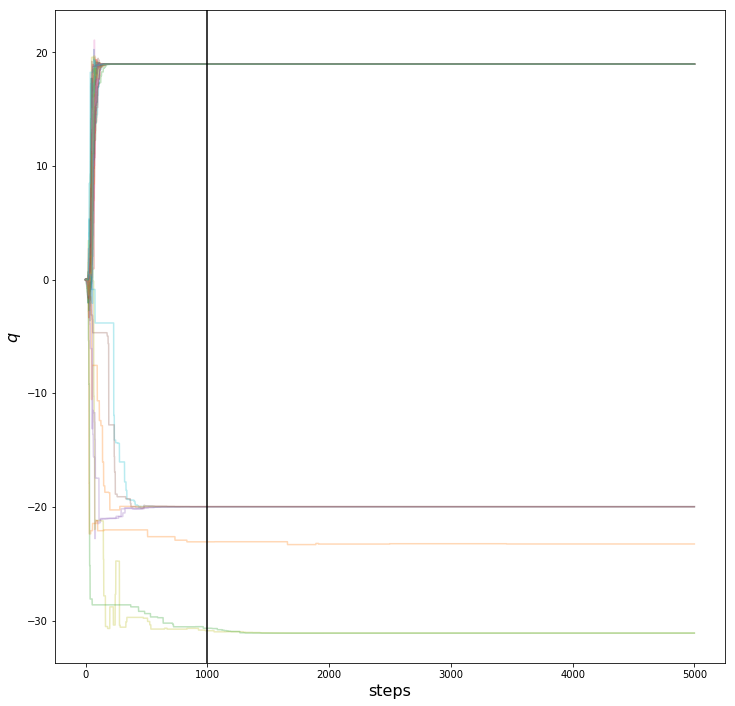

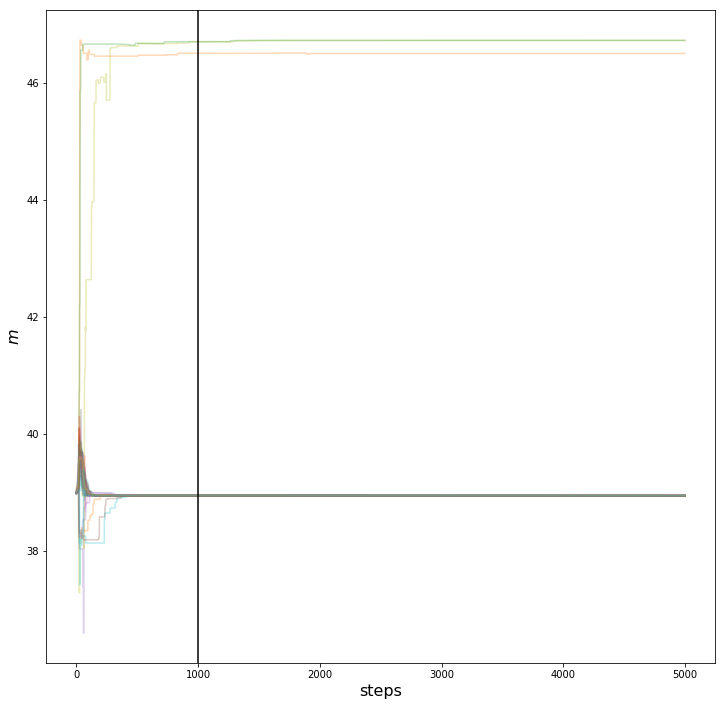

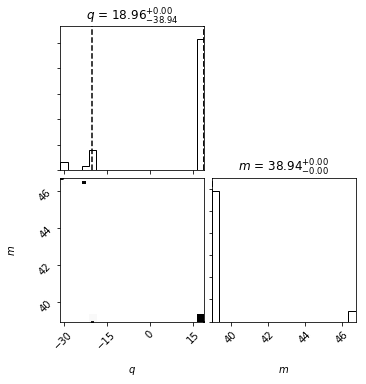

In [36]:
Temcee, Pemcee = linear_emcee(np.asarray(k9c_llc.TT), np.asarray(k9c_llc.eTT), seed=1111)

Trying scipy.stats linregress

In [57]:
def linear_opt(y, ey):
    
    # defines initial parameters
    q0 = y[0]
    mlist = np.array([y[i+1] - y[i] for i in range(0,np.shape(y)[0]-1)])
    m0 = np.median(mlist)
    init_par = [q0, m0] # initial parameters
    print 'Initial parameters: (q0, m0) = ', init_par
    
    # defines x
    x = np.rint( (y-q0)/m0 )
    
    def wres(p, x, y, ey):
        ymod = linear(p, x)
        wres = (y-ymod)/ey
        return wres
    
    res = sciopt.leastsq(wres, x0=init_par,args=(x,y,ey), full_output=True)
    popt = res[0]
    print popt
    chi2r = np.sum(np.power(wres(popt,x,y,ey),2))/(np.shape(y)[0]-np.shape(popt)[0])
    pcov = res[1]*chi2r
    print pcov
    perr = np.sqrt(np.diag(pcov))
    
    q = [popt[0], perr[0]]
    m = [popt[1], perr[1]]
    print 'q +/- eq = ', q
    print 'm +/- em = ', m
    
    return q, m


In [58]:
Topt, Popt = linear_opt(np.asarray(k9c_llc.TT), np.asarray(k9c_llc.eTT))

Initial parameters: (q0, m0) =  [2454969.3064653524, 38.9888735904824]
[2.45496876e+06 3.89502981e+01]
[[ 4.08753717e-02 -1.64683795e-03]
 [-1.64683795e-03  8.94961294e-05]]
q +/- eq =  [2454968.7619525576, 0.20217658556203463]
m +/- em =  [38.95029810900912, 0.009460239393598347]
